In [1]:
import pandas as pd
import statsmodels as sm
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate

df = pd.read_csv("USSTHPI.csv")
# df = pd.read_csv("HOUST.csv")

system_prompt = """You are working with a pandas dataframe in Python. The name of the dataframe is `df`.
                It is important to understand the attributes of the dataframe before working with it. This is the result of running `df.head().to_markdown()`

                <df>
                {dhead}
                </df>

                You also do not have use only the information here to answer questions - you can run intermediate queries to do exploratory data analysis to give you more information as needed. """
system_prompt = system_prompt.format(dhead=df.head().to_markdown())

llm = ChatOpenAI(model="gpt-4o-mini-2024-07-18", top_p=0.00001, seed=42424242)
llm_big = ChatOpenAI(model="gpt-4o", top_p=0.00001, seed=42424242)

Error in StdOutCallbackHandler.on_chain_start callback: AttributeError("'NoneType' object has no attribute 'get'")


To estimate an ARIMA model using the Box-Jenkins approach, we need to follow these steps:

1. **Visualize the Data**: Plot the time series data to understand its structure and identify any trends or seasonality.

2. **Stationarity Check**: Use statistical tests like the Augmented Dickey-Fuller (ADF) test to check if the series is stationary. If not, differencing may be required.

3. **Identify ARIMA Parameters (p, d, q)**: Use autocorrelation function (ACF) and partial autocorrelation function (PACF) plots to identify the order of the ARIMA model.

4. **Fit the ARIMA Model**: Use the identified parameters to fit the ARIMA model.

5. **Diagnostic Checking**: Check the residuals of the fitted model to ensure they behave like white noise.

6. **Forecasting**: Use the model to make forecasts.

Let's start by visualizing the data and checking for stationarity.

Action: python_repl_ast
Action Input: 
```python
import matplotlib.pyplot as plt

# Convert DATE to datetime
df['DATE'] = pd.to_dat

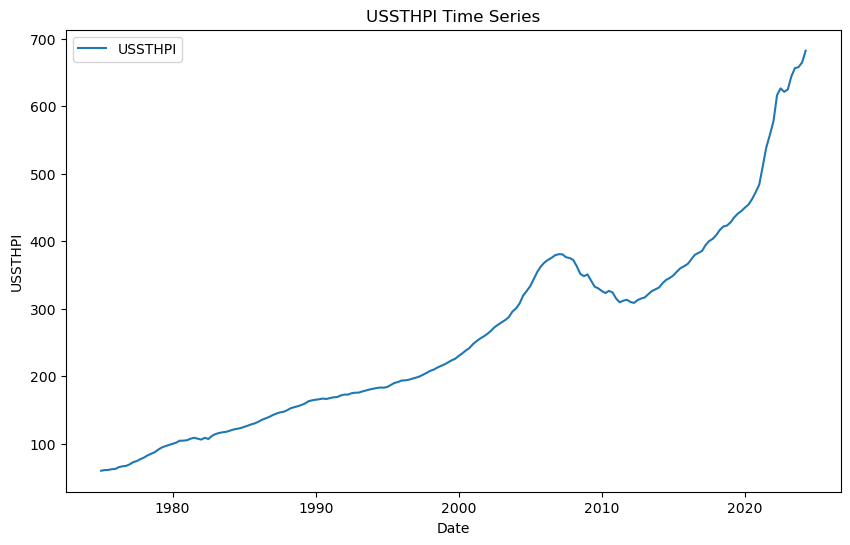

The time series plot has been generated, which allows us to visually inspect the data for any trends or seasonality. The next step is to check for stationarity using the Augmented Dickey-Fuller (ADF) test.

Action: python_repl_ast
Action Input: 
```python
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(df['USSTHPI'])

# Extract and print the test statistic and p-value
adf_statistic, p_value = adf_result[0], adf_result[1]
adf_statistic, p_value
```
(1.5839203598362757, 0.9978085246255257)The Augmented Dickey-Fuller (ADF) test results indicate a test statistic of approximately 1.58 and a p-value of approximately 0.998. Since the p-value is much higher than the common significance level of 0.05, we fail to reject the null hypothesis that the series is non-stationary. This suggests that the time series is not stationary and may require differencing.

The next step is to difference the data to achieve stationarity and then re-

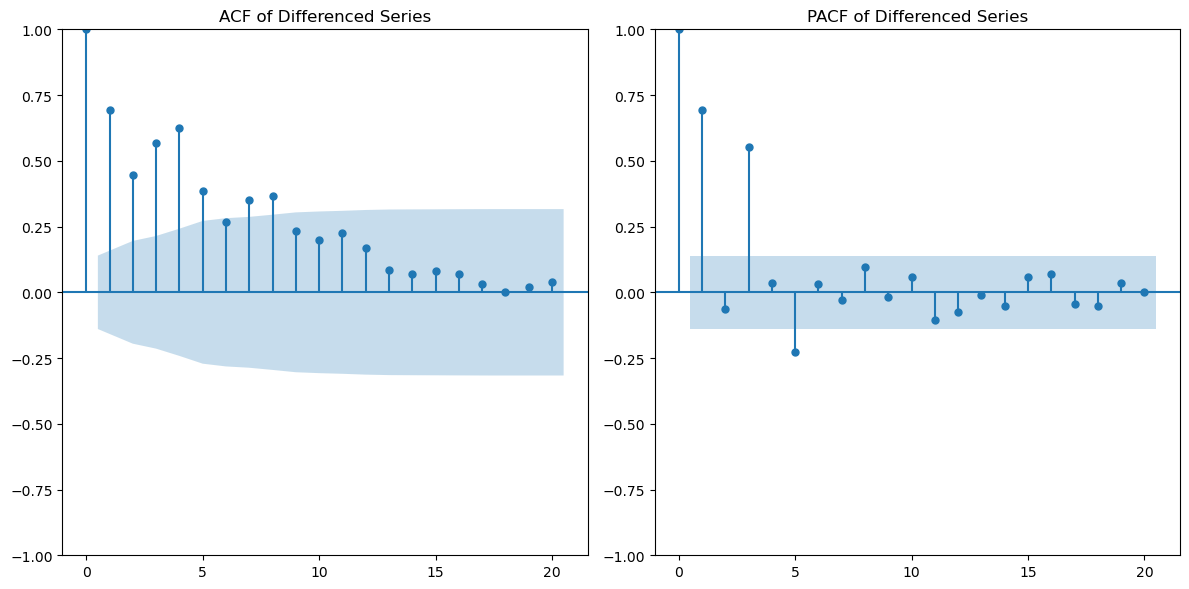

The ACF and PACF plots have been generated. These plots help in identifying the ARIMA parameters:

- **ACF (Autocorrelation Function)**: Helps in identifying the moving average (MA) order, \( q \).
- **PACF (Partial Autocorrelation Function)**: Helps in identifying the autoregressive (AR) order, \( p \).

From the plots, we can determine the appropriate values for \( p \) and \( q \). Typically, the cutoff point in the ACF plot suggests the order of \( q \), and the cutoff point in the PACF plot suggests the order of \( p \).

Let's proceed to fit the ARIMA model using the identified parameters. For this example, let's assume the ACF and PACF plots suggest \( p = 1 \) and \( q = 1 \). The differencing order \( d \) is 1, as we performed first-order differencing.

Action: python_repl_ast
Action Input: 
```python
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df['USSTHPI'], order=(1, 1, 1))
model_fit = model.fit()

# Print the model summary
model_fit.s

c:\Users\Paul\anaconda3\envs\autobox\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Paul\anaconda3\envs\autobox\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\Paul\anaconda3\envs\autobox\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                USSTHPI   No. Observations:                  198
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -545.065
Date:                Thu, 17 Oct 2024   AIC                           1096.129
Time:                        17:29:57   BIC                           1105.979
Sample:                    01-01-1975   HQIC                          1100.116
                         - 04-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5940      0.051     11.603      0.000       0.494       0.694
ma.L1          0.4824      0.087      5.548      0.000       0.312       0.653
sigma2        14.7267      0.554     26.599      0.0

{'input': ChatPromptTemplate(input_variables=[], input_types={}, partial_variables={}, messages=[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are working with a pandas dataframe in Python. The name of the dataframe is `df`.\n                It is important to understand the attributes of the dataframe before working with it. This is the result of running `df.head().to_markdown()`\n\n                <df>\n                |    | DATE       |   USSTHPI |\n|---:|:-----------|----------:|\n|  0 | 1975-01-01 |     60.03 |\n|  1 | 1975-04-01 |     60.96 |\n|  2 | 1975-07-01 |     61.19 |\n|  3 | 1975-10-01 |     62.24 |\n|  4 | 1976-01-01 |     62.78 |\n                </df>\n\n                You also do not have use only the information here to answer questions - you can run intermediate queries to do exploratory data analysis to give you more information as needed. '), additional_kwargs={}), HumanMessage(content='

In [2]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

agent = create_pandas_dataframe_agent(llm_big, df, allow_dangerous_code=True, verbose=True)

prompt = ChatPromptTemplate.from_messages(
    [
        ( "system", system_prompt, ),
        HumanMessage(content="Estimate an ARIMA model using the Box-Jenkins approach for the data provided."),
    ]
)

agent.invoke({"input": prompt}, {"recursion_limit": 10})